# Análise final - Regressão Logística

## Nome dos intregrantes do grupo:
-  **Bruno Leon Winik**

-  **Vítor Calcete Marques**

### Descrição do projeto:
O projeto 3 de Ciência dos Dados consiste na criação de um modelo preditivo para um Dataset a ser escolhido pela dupla. Após a escolha do Dataset, os integrantes irão iniciar o projeto com uma análise exploratória, afim de analisar a correlação entre as variáveis e os seus outliers. Assim que finalizada a análise exploratória, há uma preparação do Dataset para a regressão: Fizemos a transformação de variáveis categóricas em categóricas binárias, já que não é possível regredir variáveis categóricas que não sejam de "sim ou não". Além disso, devemos também separar o Dataset em "treinamento" e "teste", para treinarmos e testarmos o modelo. Vamos para o código:



## Inicialmente, vamos importar todas as bibliotecas necessárias para a criação do modelo

In [2]:
%matplotlib notebook
%reset -f
%matplotlib inline

import seaborn as sns

sns.set(style="white", font_scale=0.9)

import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas.core import datetools

RANDOM_SEED = 10

np.random.seed(RANDOM_SEED)

C:\Users\vitor\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Vamos agora limpar o Dataset

In [21]:
Heart = pd.read_csv('Projeto 3 CDD.txt')
Heart = Heart.dropna()  # Tirando os Nan do dataset 
np.sum(Heart.isnull()) # Checando se o Dataset nao tem Nan
Heart.head()


,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldspeak,Slope,Ca,Tha,Num
205,47,1,4,150.0,226.0,0.0,0.0,98.0,1.0,1.5,2.0,0.0,7.0,1
294,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
295,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
296,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
297,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0


**Dicionário de dados:**


Variável | Descrição
:---:|---:
Age | Idade
Sex | Sexo
Cp | Tipo de dor no peito
Trestbps | Pressão sanguínea em repouso( mm Hg )
Chol | Colestoral sérico em mg / dl
Fbs | Glicose no sangue
Restecg | Resultados eletrocardiográficos
Thalach | Frequência cardíaca máxima atingida
Exang | Angina induzida por exercício
Oldspeak | Depressão do segmento ST induzida pelo exercício em relação ao repouso
Slope | Inclinação do segmento ST de pico do exercício
Ca | Número de vasos saguineos principais
Tha | Talassemia
Num | Diagnóstico de doença cardíaca



## Análise descritiva dos dados 

In [22]:
Heart.describe()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldspeak,Slope,Ca,Tha,Num
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,0.67893,3.163880,131.715719,246.785953,0.143813,0.989967,149.327759,0.331104,1.058528,1.605351,0.672241,4.745819,0.946488
std,9.030264,0.46767,0.964069,17.747751,52.532582,0.351488,0.994903,23.121062,0.471399,1.162769,0.616962,0.937438,1.940977,1.230409
min,29.000000,0.00000,1.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.00000,3.000000,120.000000,211.000000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.00000,3.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.00000,4.000000,140.000000,275.500000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.00000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Para a análise correlativa, utilizaremos apenas as variáveis quantitativas:

In [23]:
Heart[['Age','Trestbps','Chol','Thalach','Oldspeak']].corr()

,Age,Trestbps,Chol,Thalach,Oldspeak
Age,1.000000,0.286149,0.199258,-0.384176,0.195929
Trestbps,0.286149,1.000000,0.134240,-0.053320,0.191144
Chol,0.199258,0.134240,1.000000,0.014894,0.033964
Thalach,-0.384176,-0.053320,0.014894,1.000000,-0.348089
Oldspeak,0.195929,0.191144,0.033964,-0.348089,1.000000


A partir da análise descritiva dos dados, podemos concluir que a maioria dos indivíduos tem entre 48 e 61 anos de idade, sendo 67% deles homens e 33% mulheres. Além disso, vemos que a taxa de colesterol no sangue dos examinados varia de 211 a 275 mg/dl. A análise de correlação nos informa que as variáveis quantitativas mais importantes são a idade, a máxima taxa de batimentos atingida e a taxa de depressão do segmento ST induzida pelo exercício em relação ao repouso. Vamos agora analisar gráficamente a relação das variáveis com a probabilidade de doença cardíaca:

## Análise gráfica dos dados

### Separação do Dataset para a análise gráfica de histogramas

In [26]:
#Separação dos que provavelmente vão ter doenças cardiacas e os que provavelmente não vão ter doencas cardiaacas

ProvavelmenteDoentes = Heart[Heart.Num >0]
ProvavelmenteSaudaveis = Heart[Heart.Num <1]

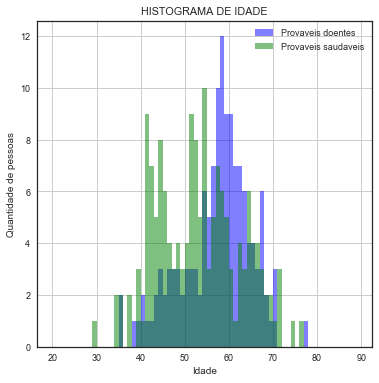

In [33]:
faixa1 = range(20,90,1)
plot = ProvavelmenteDoentes.Age.plot.hist(bins=faixa1,label = "Provaveis doentes",title='HISTOGRAMA DE IDADE', color = "blue",density=False, figsize=(6, 6), alpha=0.5)
plot = ProvavelmenteSaudaveis.Age.plot.hist(bins=faixa1,label = "Provaveis saudaveis",title='HISTOGRAMA DE IDADE', color = "green",density=False, figsize=(6, 6), alpha=0.5)
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Idade')
plt.legend()
plt.grid(True)

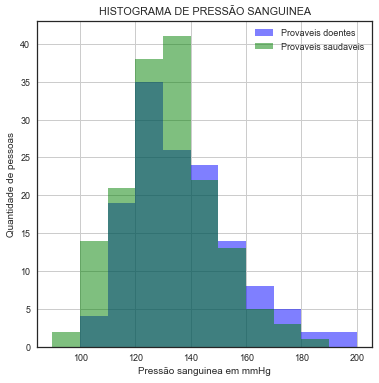

In [39]:
faixa2 = range(90,210,10)
plot = ProvavelmenteDoentes.Trestbps.plot.hist(bins=faixa2,label = "Provaveis doentes",title='HISTOGRAMA DE PRESSÃO SANGUINEA', color = "blue",density=False, figsize=(6, 6), alpha=0.5)
plot = ProvavelmenteSaudaveis.Trestbps.plot.hist(bins=faixa2,label = "Provaveis saudaveis",title='HISTOGRAMA DE PRESSÃO SANGUINEA', color = "green",density=False, figsize=(6, 6), alpha=0.5)
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Pressão sanguinea em mmHg')
plt.legend()
plt.grid(True)

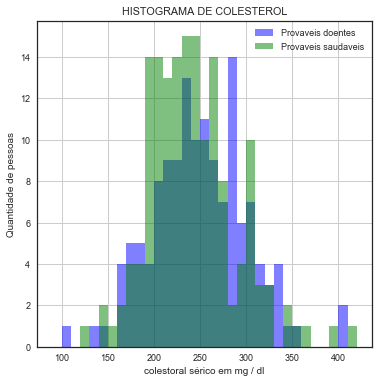

In [42]:
faixa3 = range(90,430,10)
plot = ProvavelmenteDoentes.Chol.plot.hist(bins=faixa3,label = "Provaveis doentes",title='HISTOGRAMA DE COLESTEROL', color = "blue",density=False, figsize=(6, 6), alpha=0.5)
plot = ProvavelmenteSaudaveis.Chol.plot.hist(bins=faixa3,label = "Provaveis saudaveis",title='HISTOGRAMA DE COLESTEROL', color = "green",density=False, figsize=(6, 6), alpha=0.5)
plt.ylabel('Quantidade de pessoas')
plt.legend()
plt.xlabel('colestoral sérico em mg / dl')
plt.grid(True)

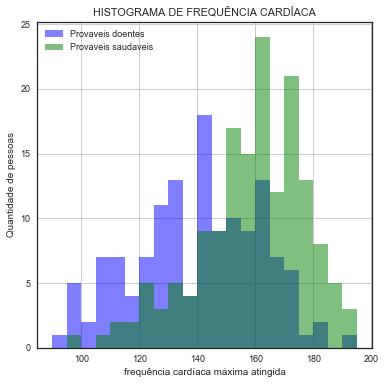

In [45]:
faixa4 = range(90,200,5)
plot = ProvavelmenteDoentes.Thalach.plot.hist(bins=faixa4,label = "Provaveis doentes",title='HISTOGRAMA DE FREQUÊNCIA CARDÍACA', color = "blue",density=False, figsize=(6, 6), alpha=0.5)
plot = ProvavelmenteSaudaveis.Thalach.plot.hist(bins=faixa4,label = "Provaveis saudaveis",title='HISTOGRAMA DE FREQUÊNCIA CARDÍACA', color = "green",density=False, figsize=(6, 6), alpha=0.5)
plt.ylabel('Quantidade de pessoas')
plt.xlabel('frequência cardíaca máxima atingida')
plt.legend()
plt.grid(True)

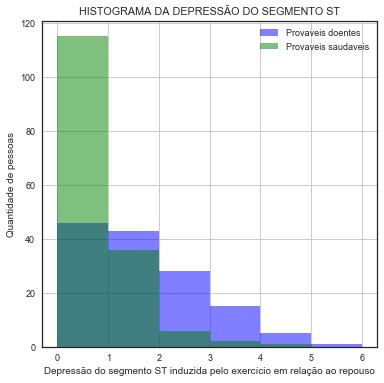

In [46]:
faixa5 = range(0,7,1)
plot = ProvavelmenteDoentes.Oldspeak.plot.hist(bins=faixa5,label = "Provaveis doentes",title='HISTOGRAMA DA DEPRESSÃO DO SEGMENTO ST', color = "blue",density=False, figsize=(6, 6), alpha=0.5)
plot = ProvavelmenteSaudaveis.Oldspeak.plot.hist(bins=faixa5,label = "Provaveis saudaveis",title='HISTOGRAMA DA DEPRESSÃO DO SEGMENTO ST', color = "green",density=False, figsize=(6, 6), alpha=0.5)
plt.ylabel('Quantidade de pessoas')
plt.legend()
plt.xlabel('Depressão do segmento ST induzida pelo exercício em relação ao repouso')
plt.grid(True)

Text(0.5,0,'número de grandes vasos no coração')

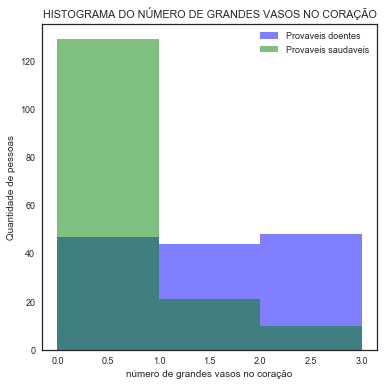

In [60]:
faixa6 = range(0,4,1)
plot = ProvavelmenteDoentes.Ca.plot.hist(bins=faixa6,label = "Provaveis doentes",title='HISTOGRAMA DO NÚMERO DE GRANDES VASOS NO CORAÇÃO', color = "blue",density=False, figsize=(6, 6), alpha=0.5)
plot = ProvavelmenteSaudaveis.Ca.plot.hist(bins=faixa6,label = "Provaveis saudaveis",title='HISTOGRAMA DO NÚMERO DE GRANDES VASOS NO CORAÇÃO', color = "green",density=False, figsize=(6, 6), alpha=0.5)
plt.ylabel('Quantidade de pessoas')
plt.legend()
plt.xlabel('número de grandes vasos no coração')

A partir da análise gráfica dos histogramas, pode-se observar que aos 60 anos há o maior número de pessoas provavelmente doentes. Já em relação á pressão sanguínea, observa-se que não há grande diferença entre os provavelmente saudáveis e os provavelmente doentes, visto que ambos se concentram na faixa de 120 a 140 mmHg. Quanto ao colesterol, percebe-se que a grande maioria dos indivíduos provavelmente saudáveis possuem colesterol entre 200 e 250 mg/dl, diferentemente dos indivíduos provavelmente doentes, que se concentram entre 250 e 300 mg/dl. Analisando o principal histograma (mais conclusivo) dos plotados acima, percebe-se evidentemente que a frequência cardíaca máxima atingida pelos indivíduos provavelmente saudáveis é maior (entre 150 e 180 batimentos por minuto) do que a frequência máxima atingida por indivíduos provavelmente doentes (entre 105 e 145 batimentos por minuto). Em relação á taxa de depressão do segmento ST em relação ao repouso, os indivíduos provavelmente saudáveis se concentram entre 0 e 1 (assimetria á direita). Já os indivíduos provavelmente doentes têm esta taxa melhor distribuída (assimetria menor), com taxa de depressão variando de 0 a 4

# Convertendo as variáveis categóricas para categóricas binárias

In [51]:
def dummify(data, column_name):
    """
        Converte a coluna column_name em dummies / one-hot e as adiciona ao dataframe
        retorna uma copia do  df original sem a coluna que foi dummified
    """
    df = data.copy()
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

In [56]:
Categorias = dummify(Heart, "Sex")
Categorias = dummify(Categorias, "Cp")
Categorias = dummify(Categorias, "Fbs")
Categorias = dummify(Categorias, "Restecg")
Categorias = dummify(Categorias, "Exang")
Categorias = dummify(Categorias, "Slope")
Categorias = dummify(Categorias, "Tha")


Categorias["Homen"] = Categorias.pop("Sex_1")
Categorias["Mulher"] = Categorias.pop("Sex_0")
Categorias["Dor Anginal tipica"] = Categorias.pop("Cp_1")
Categorias["Dor Anginal atipica"] = Categorias.pop("Cp_2")
Categorias["Dor Não Anginal"] = Categorias.pop("Cp_3")
Categorias["Dor Assintomática"] = Categorias.pop("Cp_4")
Categorias["Glicose normal"] = Categorias.pop("Fbs_0.0")
Categorias["Glicose alta"] = Categorias.pop("Fbs_1.0")
Categorias["Eletrocardiograma normal"] = Categorias.pop("Restecg_0.0")
Categorias["Eletrocardiograma anormal"] = Categorias.pop("Restecg_1.0")
Categorias["Hipertrofia no ventríoculo esquerdo "] = Categorias.pop("Restecg_2.0")
Categorias["Angina não induzida por exercício"] = Categorias.pop("Exang_0.0")
Categorias["Angina induzida por exercício"] = Categorias.pop("Exang_1.0")
Categorias["Alta inclinação no Eletrocardiograma"] = Categorias.pop("Slope_1.0")
Categorias["Inclinação normal no Eletrocardiograma"] = Categorias.pop("Slope_2.0")
Categorias["Baixa inclinação no Eletrocardiograma"] = Categorias.pop("Slope_3.0")
Categorias["Sem talassemia"] = Categorias.pop("Tha_3.0")
Categorias["Talassemia não reversivel"] = Categorias.pop("Tha_6.0")
Categorias["Talassemia reversivel"] = Categorias.pop("Tha_7.0")
#Categorias.columns

# Separação do treinamento e teste do dataset

In [67]:
Y = Categorias['Num']

X = Categorias[['Age', 'Trestbps', 'Chol', 'Thalach', 'Oldspeak', 'Ca', 'Homen',
       'Mulher', 'Dor Anginal tipica', 'Dor Anginal atipica',
       'Dor Não Anginal', 'Dor Assintomática', 'Glicose normal',
       'Glicose alta', 'Eletrocardiograma normal', 'Eletrocardiograma anormal',
       'Hipertrofia no ventríoculo esquerdo ',
       'Angina não induzida por exercício', 'Angina induzida por exercício',
       'Alta inclinação no Eletrocardiograma',
       'Inclinação normal no Eletrocardiograma',
       'Baixa inclinação no Eletrocardiograma', 'Sem talassemia',
       'Talassemia não reversivel', 'Talassemia reversivel']]


CategoriasX_train = X[:159]
CategoriasY_train = Y[:159]
CategoriasX_test = X[149:]
CategoriasY_test = Y[149:]



0.5351170568561873

# Fazendo a Regressão Logística

## Porque escolhemos essa técnica estátistica de predição de valores ?
Porque além de ser uma técnica para predizer um valor, a partir de um conjunto de observações em um modelo, permite a predição de valores categóricos.

Na nossa regressão, o objetivo é predizer os valores da variável categórica Num ( Que quando maior que 0 a pessoa tem mais de 50% de chance de ter uma doença cardiaca e quando 0 tem 50% de chance de não ter uma doença cardica.

In [68]:
from sklearn.model_selection import train_test_split
CategoriasX_train, CategoriasX_test, CategoriasY_train, CategoriasY_test = train_test_split(X, Y > 0, test_size=0.33, random_state=RANDOM_SEED)


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



model = LogisticRegression()
model.fit(CategoriasX_train, CategoriasY_train)
CategoriasY_pred = model.predict(CategoriasX_test)
print('Acurácia: {}'.format(accuracy_score(CategoriasY_test, CategoriasY_pred)))

Acurácia: 0.8080808080808081


Nossa técnica de predição obteve uma Acurácia de 80.8%, para podermos falar melhor se é uma porcentagem de acerto boa vamos compara-lá com o RandomForest da biblioteca Sklearn. 


Esse código cria um modelo que é treinado para aprender a relação entre as variavéis e a predição para poder fazer uma previsão dado as varivéis. E depois esse modelo compara as respostas que ele obteve com as respostas reais para obtermos uma porcentagem de acerto.

In [69]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state=RANDOM_SEED)
model.fit(CategoriasX_train, CategoriasY_train)
y_pred = model.predict(CategoriasX_test)
print('Acurácia: {}'.format(accuracy_score(CategoriasY_test, y_pred)))

Acurácia: 0.8181818181818182


Com o RandomForestClassifier conseguimos atingir uma acurácia de 81.81% e no nosso modelo atingimos 80.8% .

Com modelo criado, treinado e testado obtivemos uma acurácia de 80.80% , para conseguirmos qualificar essa análise usamos o modúlo RandomForestClassifier, um modelo que aleatoriamente estima e se ajusta a vários classificadores e usa a média deles para melhorar a precisão da previsão. O RandomForestClassifier obteve 81.81% então com esse resultado podemos concluir que o nosso modelo é um bom modelo visto que comparado com o modelo do RandomForestClassifier houve apenas uma diferença de 1.01%

## Análise da importância das variavéis

In [73]:
data=model.feature_importances_
data2 = np.array(['Age', 'Trestbps', 'Chol', 'Thalach', 'Oldspeak', 'Ca', 'Num ', 'Homen',
       'Mulher', 'Dor Anginal tipica', 'Dor Anginal atipica',
       'Dor Não Anginal', 'Dor Assintomática', 'Glicose normal',
       'Glicose alta', 'Eletrocardiograma normal', 'Eletrocardiograma anormal',
       'Hipertrofia no ventríoculo esquerdo ',
       'Angina não induzida por exercício', 'Angina induzida por exercício',
       'Alta inclinação no Eletrocardiograma',
       'Inclinação normal no Eletrocardiograma',
       'Baixa inclinação no Eletrocardiograma', 'Sem talassemia',
       'Talassemia não reversivel', 'Talassemia reversivel'])




dataset = pd.DataFrame({'Column1':data})
dataset['Importância relativa']=dataset.pop('Column1')
dataset

dataset2 = pd.DataFrame({"Legenda":data2})
dataset2

dataset=dataset.join(dataset2,how='inner')
dataset=dataset.set_index("Legenda")
dataset=dataset.sort_values(by = "Importância relativa", ascending=False)
dataset.head(10)

,Importância relativa
Legenda,
Ca,0.168392
Oldspeak,0.122595
Dor Não Anginal,0.087102
Thalach,0.086095
Chol,0.074826
Age,0.065968
Baixa inclinação no Eletrocardiograma,0.055988
Trestbps,0.042170
Talassemia não reversivel,0.041488
